In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = []
with open('results.out', 'r') as read_file:
    for line in read_file:
        if not line.startswith("#"):
            print(line.split())
            data = np.hstack((data,line.split()))
            # elec_orb_cr = line.split()[1]
            # elec_orb_cr_err = line.split()[2]
            # print(elec_orb_cr, elec_orb_cr_err)
data = np.array(data.reshape(3,9))
frags = np.array(data[:,0],dtype=int)
elec_orb_cr = np.array(data[:,1],dtype='float32')
elec_orb_cr_err = np.array(data[:,2],dtype='float32')
hf_orb_cr = np.array(data[:,3],dtype='float32')
hf_orb_cr_err = np.array(data[:,4],dtype='float32')
ccsd_orb_cr = np.array(data[:,5],dtype='float32')
ccsd_orb_cr_err = np.array(data[:,6],dtype='float32')
tot_orb_cr = np.array(data[:,7],dtype='float32')
tot_orb_cr_err = np.array(data[:,8],dtype='float32')
frags = np.array(data[:,0],dtype=int)
elec_orb_cr = np.array(data[:,1],dtype='float32')
elec_orb_cr_err = np.array(data[:,2],dtype='float32')
hf_orb_cr = np.array(data[:,3],dtype='float32')
hf_orb_cr_err = np.array(data[:,4],dtype='float32')
ccsd_orb_cr = np.array(data[:,5],dtype='float32')
ccsd_orb_cr_err = np.array(data[:,6],dtype='float32')
tot_orb_cr = np.array(data[:,7],dtype='float32')
tot_orb_cr_err = np.array(data[:,8],dtype='float32')
elec_cr = sum(elec_orb_cr)
elec_cr_err = np.sqrt(sum(elec_orb_cr_err**2))
hf_cr = sum(hf_orb_cr)
hf_cr_err = np.sqrt(sum(hf_orb_cr_err**2))
ccsd_cr = sum(ccsd_orb_cr)
ccsd_cr_err = np.sqrt(sum(ccsd_orb_cr_err**2))
tot_cr = sum(tot_orb_cr)
tot_cr_err = np.sqrt(sum(tot_orb_cr_err**2))
print(elec_cr,elec_cr_err)
print(hf_cr,hf_cr_err)
print(ccsd_cr,ccsd_cr_err)
print(tot_cr,tot_cr_err)
with open('results.out', 'a') as out_file:
    out_file.write(f'# final results \n')
    out_file.write(f' elec_cr {elec_cr} +/- {elec_cr_err}\n')
    out_file.write(f' hf_cr {hf_cr} +/- {hf_cr_err}\n')
    out_file.write(f' ccsd_cr {ccsd_cr} +/- {ccsd_cr_err}\n')
    out_file.write(f' tot_cr {tot_cr} +/- {tot_cr_err}\n')

In [33]:
frags = np.array(data[:,0],dtype=int)
elec_orb_cr = np.array(data[:,1],dtype='float32')
elec_orb_cr_err = np.array(data[:,2],dtype='float32')
hf_orb_cr = np.array(data[:,3],dtype='float32')
hf_orb_cr_err = np.array(data[:,4],dtype='float32')
ccsd_orb_cr = np.array(data[:,5],dtype='float32')
ccsd_orb_cr_err = np.array(data[:,6],dtype='float32')
tot_orb_cr = np.array(data[:,7],dtype='float32')
tot_orb_cr_err = np.array(data[:,8],dtype='float32')
print(frags)
print(elec_orb_cr)
print(elec_orb_cr_err)
print(hf_orb_cr)
print(hf_orb_cr_err)
print(ccsd_orb_cr)
print(ccsd_orb_cr_err)
print(tot_orb_cr)
print(tot_orb_cr_err)

[1 2 3]
[0.19291  0.194152 0.192348]
[0.003362 0.003307 0.002935]
[-0.039188 -0.037521 -0.037381]
[0.000516 0.000463 0.000424]
[-0.195533 -0.196554 -0.194883]
[0.002897 0.002889 0.00256 ]
[-0.041811 -0.039923 -0.039916]
[3.5e-05 3.4e-05 3.3e-05]


In [38]:
elec_cr = sum(elec_orb_cr)
elec_cr_err = np.sqrt(sum(elec_orb_cr_err**2))
hf_cr = sum(hf_orb_cr)
hf_cr_err = np.sqrt(sum(hf_orb_cr_err**2))
ccsd_cr = sum(ccsd_orb_cr)
ccsd_cr_err = np.sqrt(sum(ccsd_orb_cr_err**2))
tot_cr = sum(tot_orb_cr)
tot_cr_err = np.sqrt(sum(tot_orb_cr_err**2))
print(elec_cr,elec_cr_err)
print(hf_cr,hf_cr_err)
print(ccsd_cr,ccsd_cr_err)
print(tot_cr,tot_cr_err)

0.5794100016355515 0.0055545943310915035
-0.11409000307321548 0.000812650583733175
-0.5869700163602829 0.004826233561095341
-0.12165000289678574 5.8906707394716813e-05


In [ ]:
nfrag = 3
with open('results.out', 'w') as out_file:
    for ifrag in range(nfrag):
        with open(f"frg_{ifrag+1}.out","r") as read_file:
            for line in read_file:
                if "lno-ccsd_afqmc elec_orb_cr" in line:
                    out_file.write(f'fragment {ifrag+1} {line.strip()} \n')
                if "lno-ccsd_afqmc hf_orb_cr" in line:
                    out_file.write(f'fragment {ifrag+1} {line.strip()} \n')
                if "lno-ccsd_afqmc ccsd_orb_cr" in line:
                    out_file.write(f'fragment {ifrag+1} {line.strip()} \n')
                if "lno-ccsd_afqmc tot_orb_cr" in line:
                    out_file.write(f'fragment {ifrag+1} {line.strip()} \n')

In [49]:
with open('results.out', 'w') as out_file:
    print('frag \t elec_orb_cr \t err \t hf_orb_cr \t err \t ccsd_orb_cr \t err \t tot_orb_cr \t err',file=out_file)
    for ifrag in range(nfrag):
        with open(f"frg_{ifrag+1}.out","r") as read_file:
            for line in read_file:
                if "lno-ccsd_afqmc elec_orb_cr" in line:
                    elec_orb_cr = line.split()[2]
                    elec_orb_cr_err = line.split()[4]
                    #print(f'{ifrag+1} {elec_orb_cr} {elec_orb_cr_err}')
                if "lno-ccsd_afqmc hf_orb_cr" in line:
                    hf_orb_cr = line.split()[2]
                    hf_orb_cr_err = line.split()[4]
                if "lno-ccsd_afqmc ccsd_orb_cr" in line:
                    ccsd_orb_cr = line.split()[2]
                    ccsd_orb_cr_err = line.split()[4]
                if "lno-ccsd_afqmc tot_orb_cr" in line:
                    tot_orb_cr = line.split()[2]
                    tot_orb_cr_err = line.split()[4]
            print(f'{ifrag+1:3d} \t {elec_orb_cr} \t {elec_orb_cr_err} \t {hf_orb_cr} \t {hf_orb_cr_err} \t {ccsd_orb_cr} \t {ccsd_orb_cr_err} \t {tot_orb_cr} \t {tot_orb_cr_err}', file=out_file)

In [50]:
with open(f"results.out","r") as f:
    for line in f:
        print(line.split())

['frag', 'elec_orb_cr', 'err', 'hf_orb_cr', 'err', 'ccsd_orb_cr', 'err', 'tot_orb_cr', 'err']
['1', '0.196618', '0.002025', '-0.039431', '0.000273', '-0.198978', '0.001777', '-0.041792', '0.000018']
['2', '0.196484', '0.001773', '-0.038189', '0.000266', '-0.198266', '0.001533', '-0.039972', '0.000021']
['3', '0.194060', '0.001909', '-0.037610', '0.000266', '-0.196356', '0.001670', '-0.039905', '0.000023']


In [10]:
print('frag \t elec_orb_cr \t err')
for ifrag in range(3):
    with open(f"frg_{ifrag+1}.out","r") as read_file:
        for line in read_file:
            if "lno-ccsd orb_corr energy" in line:
                print(f'{ifrag+1:3d} \t {line.split()}')

frag 	 elec_orb_cr 	 err
  1 	 ['lno-ccsd', 'orb_corr', 'energy:', '-0.041721']
  2 	 ['lno-ccsd', 'orb_corr', 'energy:', '-0.039918']
  3 	 ['lno-ccsd', 'orb_corr', 'energy:', '-0.039918']


In [21]:
with open('test.out', 'w') as f:
    f.write("hh")

In [3]:
nfrag = 4
run_frg_list = range(nfrag)
for i in run_frg_list:
    print(i)

0
1
2
3


In [11]:
thresh = np.linspace(1e-4,1e-6,6)
print(thresh)

[1.00e-04 8.02e-05 6.04e-05 4.06e-05 2.08e-05 1.00e-06]


In [38]:
orb_cr_1 = np.array([-0.041778,-0.039909,-0.039926])
orb_cr_err_1 = np.array([0.000023,0.000023,0.000022])
orb_cr_2 = np.array([-0.041822,-0.040523,-0.040554])
orb_cr_err_2 = np.array([0.000022,0.000030,0.000026])
orb_cr_3 = np.array([-0.043064,-0.040581,-0.040550])
orb_cr_err_3 = np.array([0.000025,0.000032,0.000025])
orb_cr_4 = np.array([-0.044248,-0.040877,-0.040908])
orb_cr_err_4 = np.array([0.000030,0.000030,0.000029])
orb_cr_5 = np.array([-0.045017,-0.041954,-0.041967])
orb_cr_err_5 = np.array([0.000030,0.000031,0.000030])
orb_cr_6 = np.array([-0.045822,-0.042913,-0.042799])
orb_cr_err_6 = np.array([0.000041,0.000050,0.000042])
orb_cr_7 = np.array([-0.045912,-0.042960,-0.042777])
orb_cr_err_7 = np.array([0.000039,0.000047,0.000041])
tot_cr_1 = sum(orb_cr_1)
tot_cr_2 = sum(orb_cr_2)
tot_cr_3 = sum(orb_cr_3)
tot_cr_4 = sum(orb_cr_4)
tot_cr_5 = sum(orb_cr_5)
tot_cr_6 = sum(orb_cr_6)
tot_cr_7 = sum(orb_cr_7)
tot_cr = np.array([tot_cr_1,tot_cr_2,tot_cr_3,tot_cr_4,tot_cr_5,tot_cr_6,tot_cr_7])
tot_err_1 = np.sqrt(sum(orb_cr_err_1**2))
tot_err_2 = np.sqrt(sum(orb_cr_err_2**2))
tot_err_3 = np.sqrt(sum(orb_cr_err_3**2))
tot_err_4 = np.sqrt(sum(orb_cr_err_4**2))
tot_err_5 = np.sqrt(sum(orb_cr_err_5**2))
tot_err_6 = np.sqrt(sum(orb_cr_err_6**2))
tot_err_7 = np.sqrt(sum(orb_cr_err_7**2))
tot_err = np.array([tot_err_1,tot_err_2,tot_err_3,tot_err_4,tot_err_5,tot_err_6,tot_err_7])

In [39]:
e_afqmc =  -3.37474
afqmc_cr = np.array([e_afqmc - -3.24304155132341]*100)
afqmc_err = 0.00004

In [44]:
ccsd_cr = -0.12933381263427238
t_cr = -0.00197792942958244
ccsd_cr = np.array([ccsd_cr]*100)
t_cr = np.array([t_cr]*100)
ccsd_t_cr = ccsd_cr+t_cr

In [45]:
thresh = np.linspace(1e-4,1e-6,6)
thresh = np.hstack([thresh,[1e-7]])
print(thresh)

[1.00e-04 8.02e-05 6.04e-05 4.06e-05 2.08e-05 1.00e-06 1.00e-07]


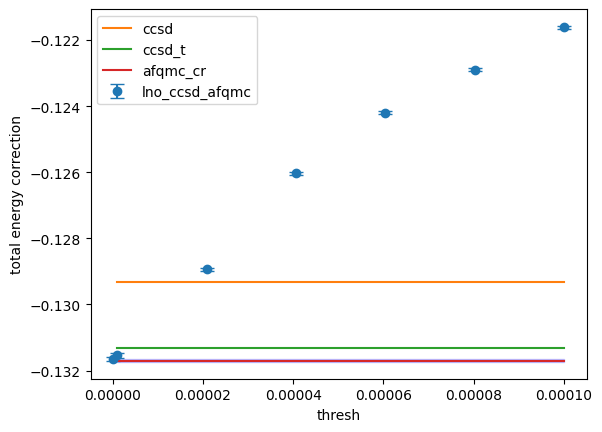

In [46]:
plt.errorbar(thresh,tot_cr,yerr=tot_err,fmt='o',capsize=5,label='lno_ccsd_afqmc')
x = np.linspace(thresh[0],thresh[5],100)
plt.plot(x,ccsd_cr,label='ccsd')
plt.plot(x,ccsd_t_cr,label='ccsd_t')
plt.plot(x,afqmc_cr,label='afqmc_cr')
plt.fill_between(x, afqmc_cr - afqmc_err, afqmc_cr + afqmc_err, color='blue', alpha=0.2)
plt.xlabel('thresh')
plt.ylabel('total energy correction')
plt.legend()
plt.show()

In [53]:
print(f"lno-cisd-afqmc correlation energy = {tot_cr_7:.6f}, err = {tot_err_7:.6f}, lno_thresh = {thresh[6]}")
print(f"cisd-afqmc correlation energy = {afqmc_cr[0]:.6f}, err = {afqmc_err:.6f}")

lno-cisd-afqmc correlation energy = -0.131649, err = 0.000074, lno_thresh = 1e-07
cisd-afqmc correlation energy = -0.131698, err = 0.000040


In [ ]:
plt.errorbar(thresh,tot_cr,yerr=tot_err,fmt='o',capsize=5,label='lno_ccsd_afqmc')
x = np.linspace(thresh[0],thresh[5],100)
plt.plot(x,ccsd_cr,label='ccsd')
plt.plot(x,ccsd_t_cr,label='ccsd_t')
plt.plot(x,afqmc_cr,label='afqmc_cr')
plt.fill_between(x, afqmc_cr - afqmc_err, afqmc_cr + afqmc_err, color='blue', alpha=0.2)
plt.xlabel('thresh')
plt.ylabel('total energy correction')
plt.legend()
plt.show()

In [ ]:
## water ##
# converged SCF energy = -76.0267469569854
# AFQMC energy: -76.24386 +/- 0.00006

In [8]:
afqmc_cr = -76.24386 + 76.0267469569854
print(afqmc_cr)
afqmc_cr = np.array([afqmc_cr]*100)
afqmc_err = 0.00006

-0.21711304301459222


In [3]:
## water ##
orb_cr_1 = np.array([-0.000295,-0.034275,-0.063628,-0.061385,-0.055649])
orb_cr_err_1 = np.array([0.000000,0.000019,0.000046,0.000047,0.000032])
orb_cr_2 = np.array([-0.000769,-0.034394,-0.064002,-0.061461,-0.055677])
orb_cr_err_2 = np.array([0.000001,0.000018,0.000046,0.000045,0.000032])
orb_cr_3 = np.array([-0.001287,-0.034444,-0.064002,-0.061461,-0.055785])
orb_cr_err_3 = np.array([0.000001,0.000020,0.000046,0.000045,0.000033])
orb_cr_4 = np.array([-0.001290,-0.034444,-0.064002,-0.061461,-0.055894])
orb_cr_err_4 = np.array([0.000001,0.000020,0.000046,0.000045,0.000034])
# orb_cr_5 = np.array([-0.045017,-0.041954,-0.041967])
# orb_cr_err_5 = np.array([0.000030,0.000031,0.000030])
# orb_cr_6 = np.array([-0.045822,-0.042913,-0.042799])
# orb_cr_err_6 = np.array([0.000041,0.000050,0.000042])
# orb_cr_7 = np.array([-0.045912,-0.042960,-0.042777])
# orb_cr_err_7 = np.array([0.000039,0.000047,0.000041])
tot_cr_1 = sum(orb_cr_1)
tot_cr_2 = sum(orb_cr_2)
tot_cr_3 = sum(orb_cr_3)
tot_cr_4 = sum(orb_cr_4)
# tot_cr_5 = sum(orb_cr_5)
# tot_cr_6 = sum(orb_cr_6)
# tot_cr_7 = sum(orb_cr_7)
tot_cr = np.array([tot_cr_1,tot_cr_2,tot_cr_3,tot_cr_4])
tot_err_1 = np.sqrt(sum(orb_cr_err_1**2))
tot_err_2 = np.sqrt(sum(orb_cr_err_2**2))
tot_err_3 = np.sqrt(sum(orb_cr_err_3**2))
tot_err_4 = np.sqrt(sum(orb_cr_err_4**2))
# tot_err_5 = np.sqrt(sum(orb_cr_err_5**2))
# tot_err_6 = np.sqrt(sum(orb_cr_err_6**2))
# tot_err_7 = np.sqrt(sum(orb_cr_err_7**2))
tot_err = np.array([tot_err_1,tot_err_2,tot_err_3,tot_err_4])

In [7]:
np.set_printoptions(6,suppress=True)
print(tot_cr)
print(tot_err)

[-0.215232 -0.216303 -0.216979 -0.217091]
[0.000076 0.000074 0.000075 0.000075]


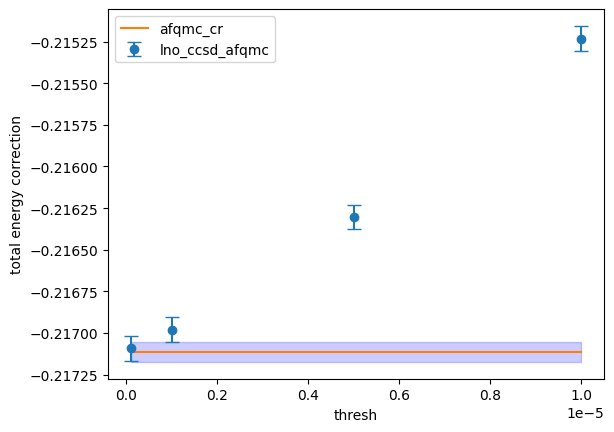

In [4]:
thresh = np.array([1e-5,5e-6,1e-6,1e-7])
plt.errorbar(thresh,tot_cr,yerr=tot_err,fmt='o',capsize=5,label='lno_ccsd_afqmc')
x = np.linspace(thresh[0],thresh[3],100)
plt.plot(x,afqmc_cr,label='afqmc_cr')
plt.fill_between(x, afqmc_cr - afqmc_err, afqmc_cr + afqmc_err, color='blue', alpha=0.2)
plt.xlabel('thresh')
plt.ylabel('total energy correction')
plt.legend()
plt.show()

In [17]:
zero_orb_cr_1 = np.array([0.197373,0.196149,0.195266])
zero_orb_cr_err_1 = np.array([2.235175e-03,2.024697e-03,2.223053e-03])
zero_orb_cr_2 = np.array([0.200295,0.199245,0.204327])
zero_orb_cr_err_2 = np.array([2.104923e-03,2.100861e-03,2.082822e-03])
zero_orb_cr_3 = np.array([0.208997,0.200076,0.201561])
zero_orb_cr_err_3 = np.array([2.316685e-03,2.261296e-03,2.207665e-03])
zero_orb_cr_4 = np.array([0.213962,0.204021,0.199907])
zero_orb_cr_err_4 = np.array([2.153489e-03,2.211507e-03,2.313420e-03])
zero_orb_cr_5 = np.array([0.208885,0.201380,0.206035])
zero_orb_cr_err_5 = np.array([2.251423e-03,2.170673e-03,2.203372e-03])
zero_orb_cr_6 = np.array([0.210128,0.220487,0.210390])
zero_orb_cr_err_6 = np.array([2.544521e-03,2.639582e-03,2.316042e-03])
zero_tot_cr_1 = sum(zero_orb_cr_1)
zero_tot_cr_2 = sum(zero_orb_cr_2)
zero_tot_cr_3 = sum(zero_orb_cr_3)
zero_tot_cr_4 = sum(zero_orb_cr_4)
zero_tot_cr_5 = sum(zero_orb_cr_5)
zero_tot_cr_6 = sum(zero_orb_cr_6)
zero_tot_cr = np.array(
    [zero_tot_cr_1,zero_tot_cr_2,zero_tot_cr_3,zero_tot_cr_4,zero_tot_cr_5,zero_tot_cr_6])
zero_tot_err_1 = np.sqrt(sum(zero_orb_cr_err_1**2))
zero_tot_err_2 = np.sqrt(sum(zero_orb_cr_err_2**2))
zero_tot_err_3 = np.sqrt(sum(zero_orb_cr_err_3**2))
zero_tot_err_4 = np.sqrt(sum(zero_orb_cr_err_4**2))
zero_tot_err_5 = np.sqrt(sum(zero_orb_cr_err_5**2))
zero_tot_err_6 = np.sqrt(sum(zero_orb_cr_err_6**2))
zero_tot_err = np.array(
    [zero_tot_err_1,zero_tot_err_2,zero_tot_err_3,zero_tot_err_4,zero_tot_err_5,zero_tot_err_6])

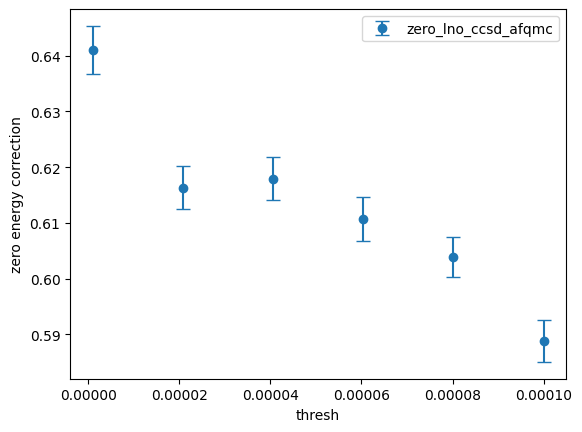

In [18]:
plt.errorbar(thresh,zero_tot_cr,yerr=zero_tot_err,fmt='o',capsize=5,label='zero_lno_ccsd_afqmc')
x = np.linspace(thresh[0],thresh[5],100)
# plt.plot(x,ccsd_cr,label='ccsd')
# plt.plot(x,ccsd_t_cr,label='ccsd_t')
plt.xlabel('thresh')
plt.ylabel('zero energy correction')
plt.legend()
plt.show()

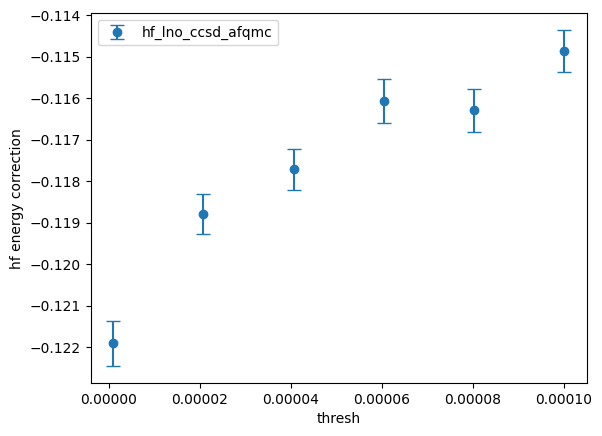

In [20]:
hf_orb_cr_1 = np.array([-0.039342,-0.037719,-0.037803])
hf_orb_cr_err_1 = np.array([0.000284,0.000295,0.000306])
hf_orb_cr_2 = np.array([-0.039770,-0.037803,-0.038719])
hf_orb_cr_err_2 = np.array([0.000306,0.000300,0.000293])
hf_orb_cr_3 = np.array([-0.039933,-0.037861,-0.038279])
hf_orb_cr_err_3 = np.array([0.000293,0.000317,0.000303])
hf_orb_cr_4 = np.array([-0.040814,-0.038703,-0.038202])
hf_orb_cr_err_4 = np.array([0.000274,0.000289,0.000306])
hf_orb_cr_5 = np.array([-0.041045,-0.039104,-0.038644])
hf_orb_cr_err_5 = np.array([0.000275,0.000291,0.000279])
hf_orb_cr_6 = np.array([-0.041859,-0.040447,-0.039604])
hf_orb_cr_err_6 = np.array([0.000301,0.000333,0.000313])
hf_tot_cr_1 = sum(hf_orb_cr_1)
hf_tot_cr_2 = sum(hf_orb_cr_2)
hf_tot_cr_3 = sum(hf_orb_cr_3)
hf_tot_cr_4 = sum(hf_orb_cr_4)
hf_tot_cr_5 = sum(hf_orb_cr_5)
hf_tot_cr_6 = sum(hf_orb_cr_6)
hf_tot_cr = np.array(
    [hf_tot_cr_1,hf_tot_cr_2,hf_tot_cr_3,hf_tot_cr_4,hf_tot_cr_5,hf_tot_cr_6])
hf_tot_err_1 = np.sqrt(sum(hf_orb_cr_err_1**2))
hf_tot_err_2 = np.sqrt(sum(hf_orb_cr_err_2**2))
hf_tot_err_3 = np.sqrt(sum(hf_orb_cr_err_3**2))
hf_tot_err_4 = np.sqrt(sum(hf_orb_cr_err_4**2))
hf_tot_err_5 = np.sqrt(sum(hf_orb_cr_err_5**2))
hf_tot_err_6 = np.sqrt(sum(hf_orb_cr_err_6**2))
hf_tot_err = np.array(
    [hf_tot_err_1,hf_tot_err_2,hf_tot_err_3,hf_tot_err_4,hf_tot_err_5,hf_tot_err_6])
plt.errorbar(thresh,hf_tot_cr,yerr=hf_tot_err,fmt='o',capsize=5,label='hf_lno_ccsd_afqmc')
x = np.linspace(thresh[0],thresh[5],100)
# plt.plot(x,ccsd_cr,label='ccsd')
# plt.plot(x,ccsd_t_cr,label='ccsd_t')
plt.xlabel('thresh')
plt.ylabel('hf energy correction')
plt.legend()
plt.show()

In [23]:
ccsd_orb_cr_1 = np.array([-0.199809,-0.198339,-0.197389])
ccsd_orb_cr_err_1 = np.array([0.001990,0.001767,0.001946])
ccsd_orb_cr_2 = np.array([-0.202347,-0.201965,-0.206162])
ccsd_orb_cr_err_2 = np.array([0.001839,0.001827,0.001828])
ccsd_orb_cr_3 = np.array([-0.212128,-0.202796,-0.203832])
ccsd_orb_cr_err_3 = np.array([0.002062,0.001966,0.001944])
ccsd_orb_cr_4 = np.array([-0.217396,-0.206194,-0.202613])
ccsd_orb_cr_err_4 = np.array([0.001910,0.001966,0.002040])
ccsd_orb_cr_5 = np.array([-0.212858,-0.204230,-0.209359])
ccsd_orb_cr_err_5 = np.array([0.002010,0.001925,0.001964])
ccsd_orb_cr_6 = np.array([-0.214091,-0.222953,-0.213585])
ccsd_orb_cr_err_6 = np.array([0.002287,0.002368,0.002063])
ccsd_tot_cr_1 = sum(ccsd_orb_cr_1)
ccsd_tot_cr_2 = sum(ccsd_orb_cr_2)
ccsd_tot_cr_3 = sum(ccsd_orb_cr_3)
ccsd_tot_cr_4 = sum(ccsd_orb_cr_4)
ccsd_tot_cr_5 = sum(ccsd_orb_cr_5)
ccsd_tot_cr_6 = sum(ccsd_orb_cr_6)
ccsd_tot_cr = np.array(
    [ccsd_tot_cr_1,ccsd_tot_cr_2,ccsd_tot_cr_3,ccsd_tot_cr_4,ccsd_tot_cr_5,ccsd_tot_cr_6])
ccsd_tot_err_1 = np.sqrt(sum(ccsd_orb_cr_err_1**2))
ccsd_tot_err_2 = np.sqrt(sum(ccsd_orb_cr_err_2**2))
ccsd_tot_err_3 = np.sqrt(sum(ccsd_orb_cr_err_3**2))
ccsd_tot_err_4 = np.sqrt(sum(ccsd_orb_cr_err_4**2))
ccsd_tot_err_5 = np.sqrt(sum(ccsd_orb_cr_err_5**2))
ccsd_tot_err_6 = np.sqrt(sum(ccsd_orb_cr_err_6**2))
ccsd_tot_err = np.array(
    [ccsd_tot_err_1,ccsd_tot_err_2,ccsd_tot_err_3,ccsd_tot_err_4,ccsd_tot_err_5,ccsd_tot_err_6])

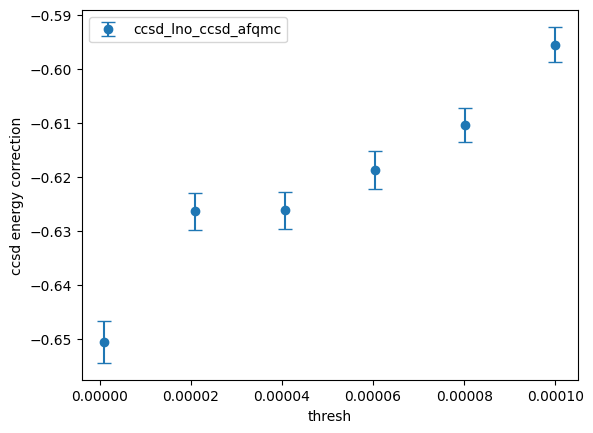

In [25]:
plt.errorbar(thresh,ccsd_tot_cr,yerr=ccsd_tot_err,fmt='o',capsize=5,label='ccsd_lno_ccsd_afqmc')
x = np.linspace(thresh[0],thresh[5],100)
# plt.plot(x,ccsd_cr,label='ccsd')
# plt.plot(x,ccsd_t_cr,label='ccsd_t')
plt.xlabel('thresh')
plt.ylabel('ccsd energy correction')
plt.legend()
plt.show()